<a href="https://colab.research.google.com/github/ViniGustavo/Desenvolvimento-Software-VisuaDesenvolvimento-Software-Visuall/blob/main/DesempenhoDeEstudantesGrafico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Análise de Desempenho Escolar de estudantes dos Estados Unidos
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('/content/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

(1000, 8)

In [ ]:
df['gender'].value_counts() #generos entrevistados


,count
gender,
female,518
male,482


In [ ]:
df['race/ethnicity'].value_counts() #raças separadas por grupos de A à E

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


In [ ]:
df['parental level of education'].value_counts() #nivel de escolaridade dos pais
#associate degree = diploma de associado
#mestrado


,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [ ]:
df['lunch'].value_counts() #standard compra lanche e free recebe na escola ou tem desconto(reduced)

,count
lunch,
standard,645
free/reduced,355


In [ ]:
df['test preparation course'].value_counts() #curso de preparação completo e incompleto

,count
test preparation course,
none,642
completed,358


In [ ]:
df.groupby('race/ethnicity')['gender'].value_counts() #generos divididos nas raças/etnias

race/ethnicity  gender
group A         male       53
                female     36
group B         female    104
                male       86
group C         female    180
                male      139
group D         male      133
                female    129
group E         male       71
                female     69
Name: count, dtype: int64

In [ ]:
df[df['math score']==100] #alunos que gabaritaram matematica

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


In [ ]:
df[df['math score']==0] #alunos que zeraram matematica

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


In [ ]:
df[df['math score']<60]['math score'].count() #quantidade de alunos que tiraram menos de  60 em matemarica

323

In [ ]:
df[df['math score']>60]['math score'].count() #quantidade de alunos que tiraram mais de 60 em matematica

661

In [ ]:
df[(df['reading score'] == 100)] #alunos que gabaritaram leitura

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
106,female,group D,master's degree,standard,none,87,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
149,male,group E,associate's degree,free/reduced,completed,100,100,93
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
381,male,group C,associate's degree,standard,completed,87,100,95
458,female,group E,bachelor's degree,standard,none,100,100,100
546,female,group A,some high school,standard,completed,92,100,97
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
594,female,group C,bachelor's degree,standard,completed,92,100,99


In [ ]:
df[(df['reading score'] == 0)]['reading score'].count() #quantidade de alunos que zeraram leitura

0

In [ ]:
df[df['reading score'] < 60]['reading score'].count()  #quantidade de alunos que tiraram menos de 60 na leitura

254

In [ ]:
df[df['reading score'] >60]['reading score'].count()  #quantidade de alunos que tiraram mais de 60 na leitura

725

In [ ]:
df[['writing score', 'math score', 'reading score']].describe() #std desvio padrao


,writing score,math score,reading score
count,1000.000000,1000.00000,1000.000000
mean,68.054000,66.08900,69.169000
std,15.195657,15.16308,14.600192
min,10.000000,0.00000,17.000000
25%,57.750000,57.00000,59.000000
50%,69.000000,66.00000,70.000000
75%,79.000000,77.00000,79.000000
max,100.000000,100.00000,100.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

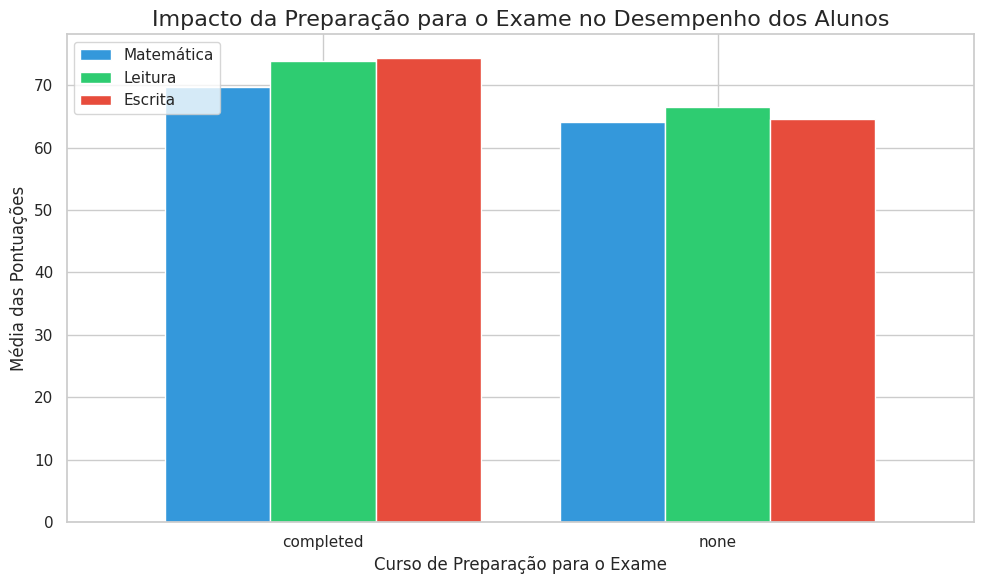

In [ ]:
# Calcular as médias das pontuações
scores_mean = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().reset_index()

# Configurações de estilo
sns.set(style="whitegrid")

# Criar um gráfico de barras agrupadas
scores_mean.set_index('test preparation course').plot(kind='bar', figsize=(10, 6), width=0.8, color=['#3498db', '#2ecc71', '#e74c3c'])

plt.title('Impacto da Preparação para o Exame no Desempenho dos Alunos', fontsize=16)
plt.ylabel('Média das Pontuações', fontsize=12)
plt.xlabel('Curso de Preparação para o Exame', fontsize=12)
plt.xticks(rotation=0)

plt.legend(['Matemática', 'Leitura', 'Escrita'], loc='upper left')

# Mostrar gráfico
plt.tight_layout()
plt.show()

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


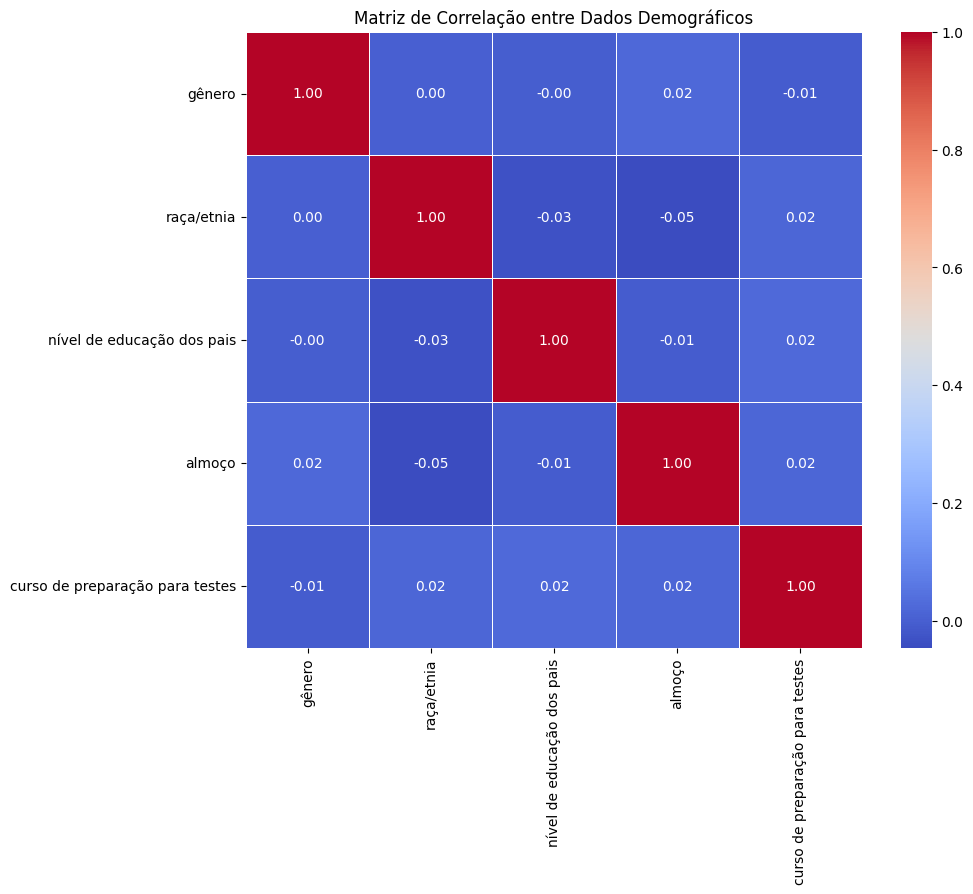

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')

print(df.head())

df.rename(columns={
    'gender': 'gênero',
    'race/ethnicity': 'raça/etnia',
    'parental level of education': 'nível de educação dos pais',
    'lunch': 'almoço',
    'test preparation course': 'curso de preparação para testes'
}, inplace=True)

# Convertendo dados categóricos para numéricos para análise
df['gênero'] = df['gênero'].map({'female': 1, 'male': 0})
df['raça/etnia'] = df['raça/etnia'].astype('category').cat.codes
df['nível de educação dos pais'] = df['nível de educação dos pais'].astype('category').cat.codes
df['almoço'] = df['almoço'].map({'standard': 0, 'free/reduced': 1})
df['curso de preparação para testes'] = df['curso de preparação para testes'].map({'none': 0, 'completed': 1})

# Selecionando apenas as colunas demográficas
colunas_demograficas = ['gênero', 'raça/etnia', 'nível de educação dos pais', 'almoço', 'curso de preparação para testes']
dados_demograficos = df[colunas_demograficas]

# Calculando a matriz de correlação
matriz_correlacao = dados_demograficos.corr()

# Criando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True, linewidths=.5)
plt.title('Matriz de Correlação entre Dados Demográficos')
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
!pip install plotly pandas ipywidgets

In [ ]:
import pandas as pd
import plotly.express as px

data = pd.read_csv('StudentsPerformance.csv')

print(data.head())  # Mostra as primeiras linhas do DataFrame

# Criar gráfico de colunas para as notas em matemática
fig_math = px.bar(data, x='gender', y='math score', color='race/ethnicity',
                  title='Desempenho em Matemática por Gênero e Grupo Étnico',
                  labels={'gender': 'Gênero', 'math score': 'Nota em Matemática'},
                  barmode='group')
# Mostrar o gráfico de matemática
fig_math.show()

# Criar gráfico de colunas para as notas em leitura
fig_reading = px.bar(data, x='gender', y='reading score', color='race/ethnicity',
                     title='Desempenho em Leitura por Gênero e Grupo Étnico',
                     labels={'gender': 'Gênero', 'reading score': 'Nota em Leitura'},
                     barmode='group')
# Mostrar o gráfico de leitura
fig_reading.show()

# Criar gráfico de colunas para as notas em escrita
fig_writing = px.bar(data, x='gender', y='writing score', color='race/ethnicity',
                     title='Desempenho em Escrita por Gênero e Grupo Étnico',
                     labels={'gender': 'Gênero', 'writing score': 'Nota em Escrita'},
                     barmode='group')
# Mostrar o gráfico de escrita
fig_writing.show()

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
